## En este programa integramos el problema de N-cuerpos

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Constantes

In [24]:
G = 4.299e-6   # Unidades kpc*Msol^-1*(km/s)**2
eps = 0.9      #softening 

### Generamos las condiciones iniciales

In [25]:
import random
import uniform_density as ud

N   = 1000

m = np.ones(N)*1e10
m = m/N

range_r3  = np.linspace(0, 1/3., 2*N)
range_ct  = np.linspace(-1, 1, 2*N)
range_phi = np.linspace(0, 2*np.pi, 2*N)

r3  = np.random.choice(range_r3,  N, replace = True) #r**3
ct  = np.random.choice(range_ct,  N, replace = True) #cos(t)
phi = np.random.choice(range_phi, N, replace = True) #phi

st = np.sqrt(1. - ct**2) #sen(t)

x = (r3*3)**(1/3.) * st * np.cos(phi)
y = (r3*3)**(1/3.) * st * np.sin(phi)
z = (r3*3)**(1/3.) * ct
    
# x, y, z = ud.dens(N)

x = x*100
y = y*100
z = z*100

vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)


In [26]:
pos = np.ndarray([N,3])
pos[:,0] = x
pos[:,1] = y
pos[:,2] = z

#print pos

vel = np.ndarray([N,3])
vel[:,0] = vx
vel[:,1] = vy
vel[:,2] = vz

# print vel

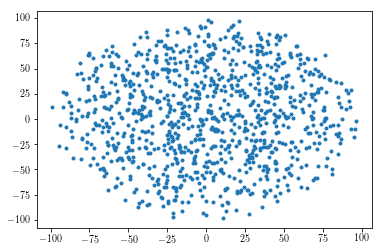

In [17]:
plot(x,y,'.')

In [5]:
#aceleraciones iniciales
# import fuerza as fz

# acel = fz.aceleraciones(eps,x,y,z,m)

In [27]:
from integradores_modificado import *
ax,ay,az = integradores_modificado.aceleracion(eps,m,x,y,z)

In [11]:
# print numpy.__version__
# print numpy.__path__

1.13.3
['/home/omarioni/.conda/envs/conda-env/lib/python2.7/site-packages/numpy']


In [ ]:
# from integradores2 import *
# eps = 0.5
# a = integradores.a_str(eps,m,x,y,z)

### Acá definimos el paso y el numero de pasos

In [28]:
dt = 0.0001  #paso
nit = 100000   #numero de pasos

# EULER

In [48]:
# import integradores as intg
# posf,velf,acf = intg.euler(eps,dt,nit,m,pos,vel,acel)

In [7]:
# from integradores_modificado import *
q1 = integradores_modificado.euler(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [49]:
# path = '/home/omarioni/mn2/_data/NC/euler/'

# xf = np.zeros((nit/10,len(m)))
# yf = np.zeros((nit/10,len(m)))
# zf = np.zeros((nit/10,len(m)))

# j=0
# for i in np.arange(0,nit,10):
    
#     posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    
#     xf[j,:] = posf[:,0]
#     yf[j,:] = posf[:,1]
#     zf[j,:] = posf[:,2]
    
#     j += 1

In [8]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_euler.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

print shape(xf)

(1000, 1000)


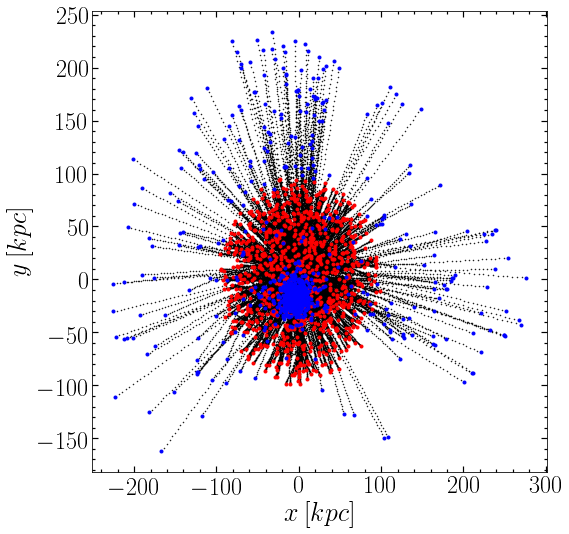

In [60]:
# from __future__ import unicode_literals

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

# fig=plt.figure(1, figsize=(8,8))
# fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
# ax=fig.add_subplot(111)
# ax.plot(xf,yf,'.k', markersize=1)
# ax.plot(xf[0,:],yf[0,:],'.r')
# ax.plot(xf[-1,:],yf[-1,:],'.b')
# # ax.set_xlim(-apo-10,p+10)
# # ax.set_ylim(-a-10,a+10)
# ax.minorticks_on()
# ax.tick_params( labelsize=24)
# ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
# ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
# ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
# ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# # fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
# plt.show()

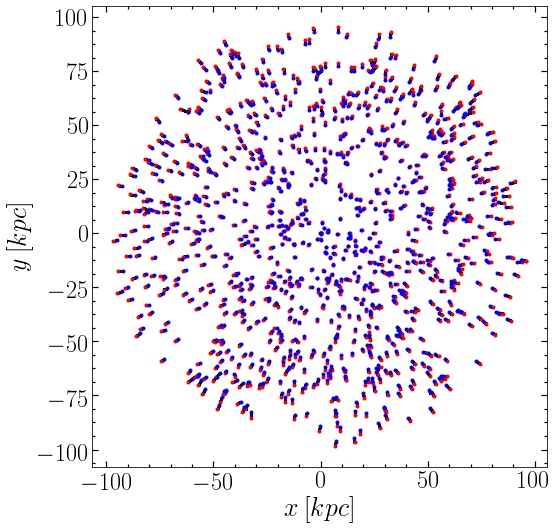

In [9]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[0,:],yf[0,:],'.r')
ax.plot(xf[-1,:],yf[-1,:],'.b')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# RUNGE

In [10]:
# from integradores_modificado import *
q2= integradores_modificado.rungek(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [21]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_runge.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

print shape(xf)

(1000, 1000)


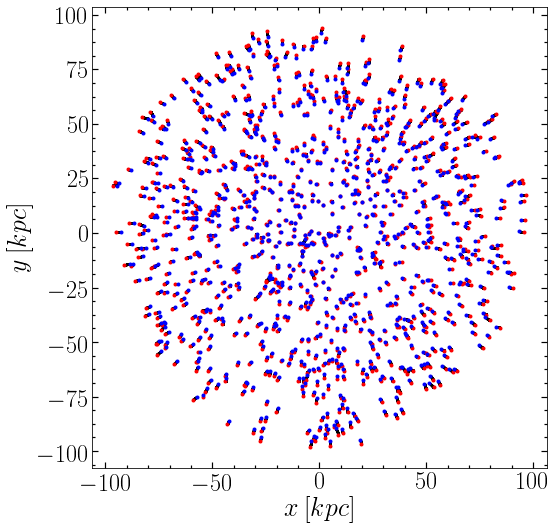

In [22]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[0,:],yf[0,:],'.r')
ax.plot(xf[-1,:],yf[-1,:],'.b')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## Leapfrog - DKD

In [29]:
from integradores_modificado import *
q3 = integradores_modificado.driftkdrift(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [30]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_DKD.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

print shape(xf)

(10000, 1000)


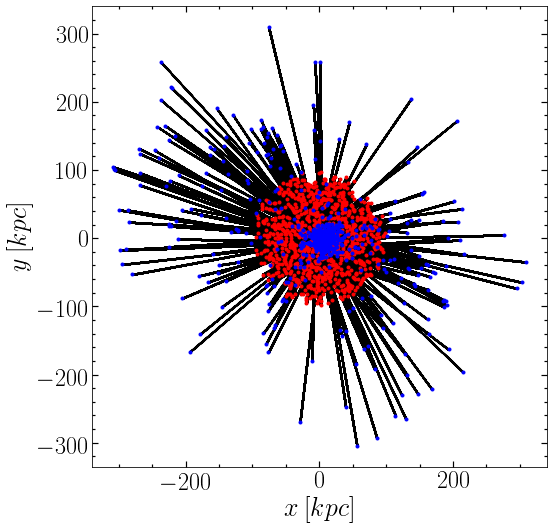

In [31]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[0,:],yf[0,:],'.r')
ax.plot(xf[-1,:],yf[-1,:],'.b')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## Leapfrog - KDK

In [20]:
from integradores_modificado import *
q4 = integradores_modificado.kickdkick(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [21]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_KDK.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

print shape(xf)

(1000, 1000)


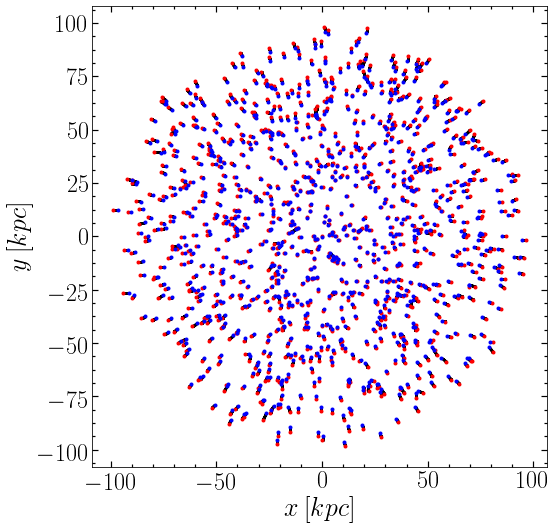

In [22]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[0,:],yf[0,:],'.r')
ax.plot(xf[-1,:],yf[-1,:],'.b')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()